In [1]:
%matplotlib notebook
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import imread
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(3)
K = 3
D = 2
Npc = 20
N = Npc * K
var = 0.1
centres = np.array([[-0.25, -0.25], [0.5, 0], [0, 0.5]])
X = np.zeros([N, D])
for i in range(K):
    X[i * Npc: (i + 1) * Npc] = np.random.randn(Npc, D) * var +  centres[i]

In [3]:
# Fit PCA to data
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

<IPython.core.display.Javascript object>


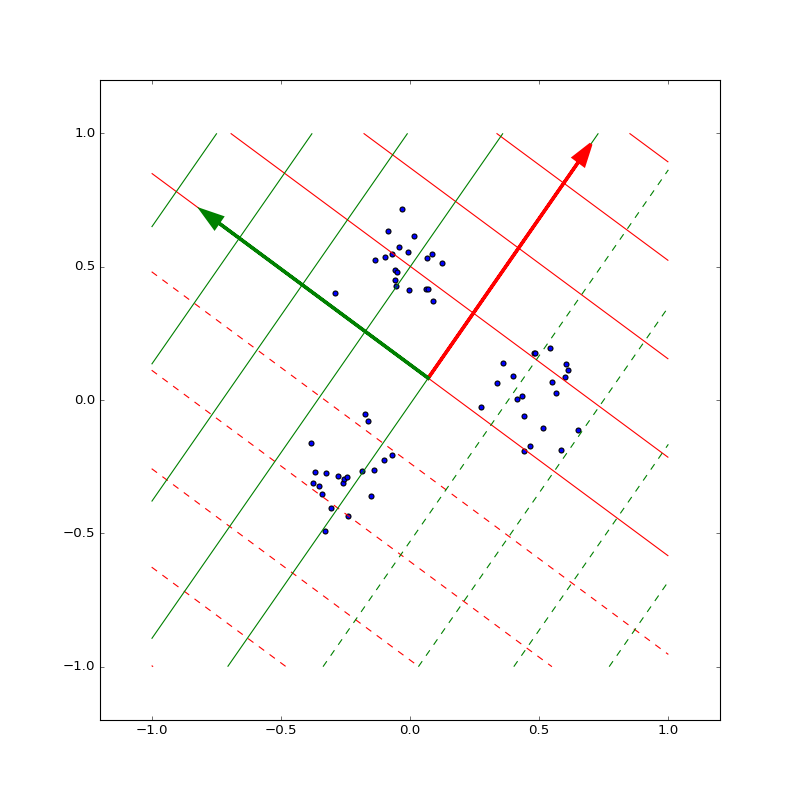

In [4]:
# Make PCA plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.scatter(X[:, 0], X[:, 1])
ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1], lw=3, fc='r', ec='r', head_width=0.05, head_length=0.08, zorder=3)
ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[1, 0], pca.components_[1, 1], lw=3, fc='g', ec='g', head_width=0.05, head_length=0.08, zorder=3)

xx, yy = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
ZPC1 = pca.transform(np.c_[np.ravel(xx), np.ravel(yy)])[:, 0].reshape(xx.shape)
ZPC2 = pca.transform(np.c_[np.ravel(xx), np.ravel(yy)])[:, 1].reshape(xx.shape)

ax.contour(xx, yy, ZPC1, 10, colors='red', origin='lower')
ax.contour(xx, yy, ZPC2, 10, colors='green', origin='lower')

<IPython.core.display.Javascript object>


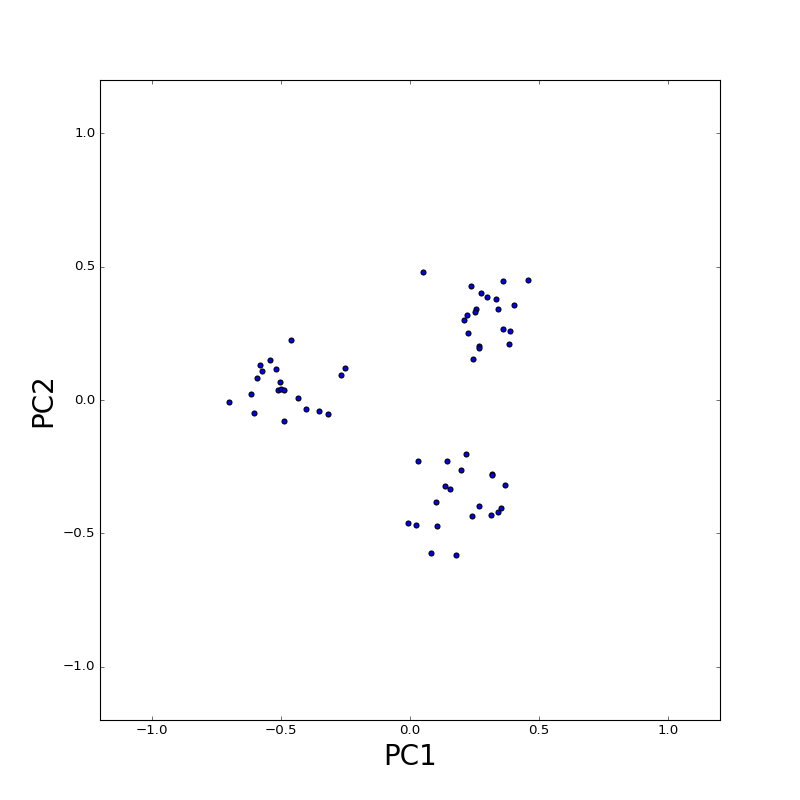

In [5]:
Z = pca.transform(X)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('PC1', fontsize=25)
ax.set_ylabel('PC2', fontsize=25)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(Z[:, 0], Z[:, 1])

In [6]:
# Fit kPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components=50)
kpca.fit(X)

KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=10, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=50,
     remove_zero_eig=False, tol=0)

<IPython.core.display.Javascript object>


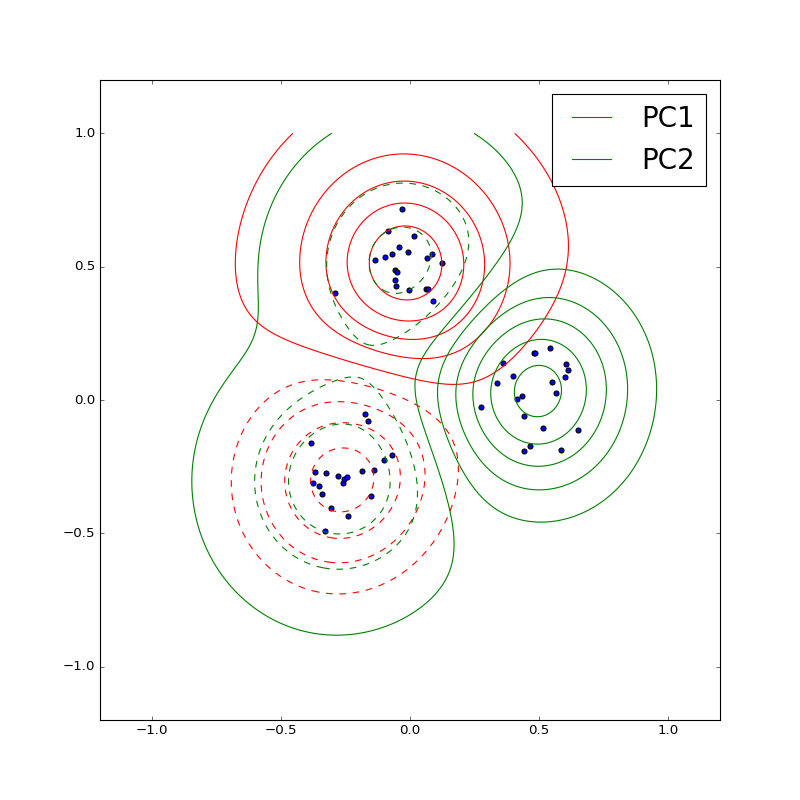

In [7]:
# Make PCA plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.scatter(X[:, 0], X[:, 1])
#ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1], lw=3, fc='r', ec='r', head_width=0.05, head_length=0.08, zorder=3)
#ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[1, 0], pca.components_[1, 1], lw=3, fc='g', ec='g', head_width=0.05, head_length=0.08, zorder=3)

xx, yy = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
ZkPC1 = kpca.transform(np.c_[np.ravel(xx), np.ravel(yy)])[:, 0].reshape(xx.shape)
ZkPC2 = kpca.transform(np.c_[np.ravel(xx), np.ravel(yy)])[:, 1].reshape(xx.shape)


cs1 = ax.contour(xx, yy, ZkPC1, 10, colors='red', origin='lower' )
cs2 = ax.contour(xx, yy, ZkPC2, 10, colors='green', origin='lower')

cs1.collections[len(cs1.collections) - 1].set_label('PC1')
cs2.collections[len(cs2.collections) - 1].set_label('PC2')

ax.legend(loc='upper right', fontsize=25)


<IPython.core.display.Javascript object>


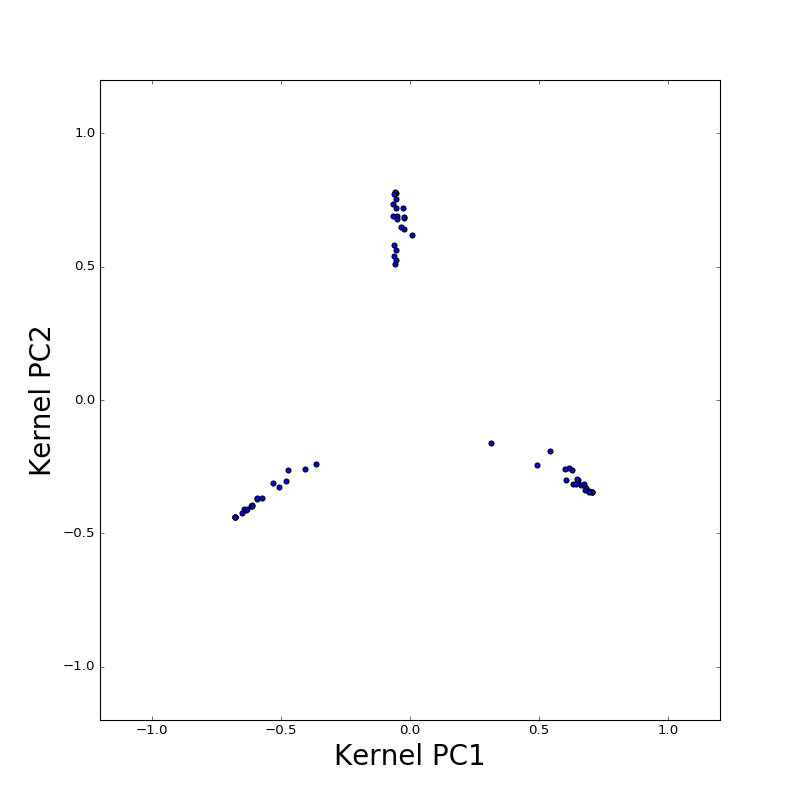

In [8]:
Z = kpca.transform(X)[:, 0:2]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Kernel PC1', fontsize=25)
ax.set_ylabel('Kernel PC2', fontsize=25)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(Z[:, 0], Z[:, 1])